In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import random

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
## Generate random features
X = np.array([random.uniform(0, 100) for _ in range(500)])
y = np.array([1 if value > 50 else 0 for value in X])

In [3]:
dict = {"Feature value":X, "Target":y}
df = pd.DataFrame(dict)
df

,Feature value,Target
0,62.619397,1
1,10.927903,0
2,79.506259,1
3,84.561988,1
4,63.667716,1
...,...,...
495,9.371929,0
496,23.503237,0
497,98.609748,1
498,82.511442,1


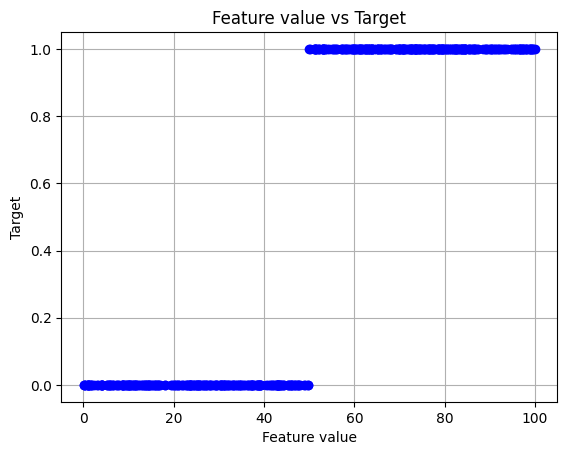

In [4]:
#Plotting the data
plt.plot(X, y, 'o', c="blue")
plt.title("Feature value vs Target")
plt.xlabel("Feature value")
plt.ylabel("Target")
plt.grid()
plt.show()

In [5]:
#Splitting the data
X_train = X[:400]
y_train = y[:400]
X_test = X[400:]
y_test = y[400:]

In [6]:
#Making all the necessary functions

def pick_weights_and_biases():
    w = np.random.rand()
    b = np.random.rand()
    return w, b

def sigmoid(z):
    return (1/(1 + np.exp(-z)))

def calculate_cost(X_data, y_data, w, b):
    cost = 0
    m = len(X_data)
    epsilon = 1e-15  # Small value to avoid log(0)
    for i in range(m):
        z = (w * X_data[i]) + b
        f_wb = sigmoid(z)
        cost += (-y_data[i] * np.log(f_wb + epsilon)) - ((1 - y_data[i]) * np.log(1 - f_wb + epsilon))
    cost = cost / m
    return cost


def calculate_gradient(X_data, y_data, w, b):
    dj_dw = 0
    dj_db = 0
    m = len(X_data)
    for i in range(m):
        z = (w * X_data[i]) + b
        f_wb = sigmoid(z)
        dj_dw_i = (f_wb - y_data[i]) * X_data[i]
        dj_db_i = (f_wb - y_data[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

def gradient_descent(X_data, y_data, w, b, alpha, iterations):
    for i in range(iterations):
        dj_dw, dj_db = calculate_gradient(X_data, y_data, w, b)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        if i%1000 == 0:
            print(f" i = {i} ---> cost = {calculate_cost(X_data, y_data, w, b)}")
    return w, b


In [7]:
#Putting everything together
w_initial, b_initial = pick_weights_and_biases()

print(f"Before gradient descent: \n w = {w_initial} \n b = {b_initial}")
print(f"Cost (before gradient descent): {calculate_cost(X_train, y_train, w_initial, b_initial)}")
w_final, b_final = gradient_descent(X_train, y_train, w_initial, b_initial, 0.02, 10000)
print(f"After gradient descent: \n w = {w_final} \n b = {b_final}")
print(f"Cost (after gradient descent): {calculate_cost(X_train, y_train, w_final, b_final)}")

Before gradient descent: 
 w = 0.5637542290126879 
 b = 0.3065866297401407
Cost (before gradient descent): 6.9756111104592105
 i = 0 ---> cost = 4.064023180952001
 i = 1000 ---> cost = 1.0647615618387543
 i = 2000 ---> cost = 4.221219211164409
 i = 3000 ---> cost = 0.36907393802384064
 i = 4000 ---> cost = 0.1012288403945257
 i = 5000 ---> cost = 0.23782309894726483
 i = 6000 ---> cost = 0.178644144918932
 i = 7000 ---> cost = 0.16013648832008243
 i = 8000 ---> cost = 0.14086731140718706
 i = 9000 ---> cost = 0.12030758333487673
After gradient descent: 
 w = 0.2644416273661304 
 b = -11.349468707270308
Cost (after gradient descent): 0.11833399034763462


In [8]:
predicted = np.zeros(400)
for i in range(400):
    predicted[i] = (w_final * X_train[i]) + b_final

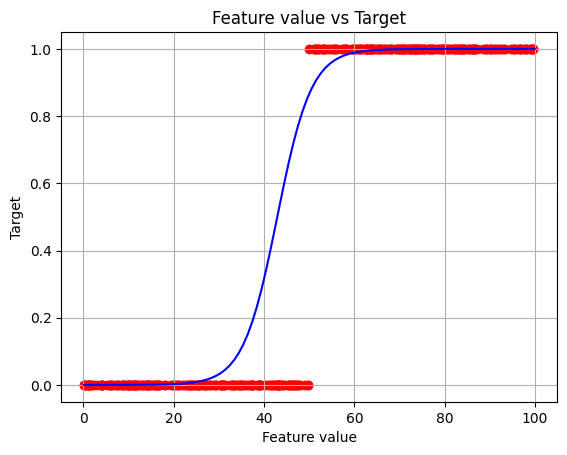

In [9]:
#Plotting the sigmoid plot


#Plotting Sigmoid function
x_range = np.linspace(min(X), max(X), 100)
y_range = sigmoid(w_final * x_range + b_final)
plt.plot(x_range, y_range, color='blue', label='Logistic Function')
plt.scatter(X_train, y_train, c='red', marker='o', label='Data Points')

plt.title("Feature value vs Target")
plt.xlabel("Feature value")
plt.ylabel("Target")
plt.grid()
plt.show()


# plt.plot(X_train, sigmoid(predicted), 'o', c="red")
# plt.plot(X_train, y_train, 'o', c="blue")
# plt.title("Feature value vs Target")
# plt.xlabel("Feature value")
# plt.ylabel("Target")
# plt.grid()
# plt.show()

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Making predictions
y_preds = sigmoid(w_final * X_test + b_final)

# Convert predictions to binary (0 or 1) based on a threshold (e.g., 0.5)
threshold = 0.3
y_preds_binary = [1 if pred >= threshold else 0 for pred in y_preds]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_preds_binary)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_preds_binary)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_preds_binary)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_preds_binary)
print("F1 Score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_preds_binary)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.95
Precision: 0.9152542372881356
Recall: 1.0
F1 Score: 0.9557522123893806
Confusion Matrix:
 [[41  5]
 [ 0 54]]
